<a href="https://colab.research.google.com/github/gabrielaugustom/meu-portfolio/blob/master/An%C3%A1lise_Bruno_van_Enck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLP para analisar Bruno van Enck, CEO da Barbearia Corleone

O **Processamento de Linguagem Natural (Natural Language Processing – NLP)** é um campo da **Ciência da Computação e Inteligência Artificial** que desenvolve a capacidade de **máquinas entenderem a nossa linguagem**. Mais que apenas “entender”, com a NLP é possível interpretar frases, realizar análises semânticas ou **analisar sentimentos**.

Para modelar a língua e possibilitar que máquina entenda, são necessários processamentos com o *dataset* deixando apenas o que é informação relevante. 

<center><img alt="Analisando Airbnb" width="40%" src="https://i2.wp.com/www.medicaltecnica.com.br/wp-content/uploads/2017/10/hemisferios-del-cerebro.gif"></center>

O campo é gigante e promissor. Técnicas de Machine Learning aplicadas à análise de dados permitem coisas como:

* Identificar se uma avaliação feita em um livro na Amazon foi positiva ou negativa.

* **Identificar sintomas de depressão** em pessoas a partir de suas postagens em redes sociais como Facebook ou Twitter.

* Encontrar potenciais eleitores favoráveis a um determinado candidato; e

* Identificar quais palavras são mais utilizadas pelo analisado em uma entrevista.

Neste artigo, meu objetivo é apresentar a área da NLP e técnicas de Text Mining usando Python para que você conheça as possibilidades e potencialidades de uso.

<center><img alt="Analisando Airbnb" width="80%" src="https://www.baressp.com.br/bares/fotos2/barbearia-corleone-baressp-3-min.jpg"></center>

<center>Barbearia Corleone Itaim Bibi</center>

Como Estudo de Caso, escolhi analisar o empreendedor que admiro na atualidade (Brasil e no Mundo): **Bruno van Enck, fundador e CEO da Barbearia Corleone.**

**Bruno** é fundador da Barbearia Corleone e quem está à frente das lojas com várias unidades em São Paulo, perfil **empreendedor nato** dos que vendem lenço enquanto alguns choram. Atitude encorajada por seu Pai, dono de restaurante já consagrado também em São Paulo.

O sucesso de Bruno é inquestionável, sempre defendeu pagar os impostos quando se empreende, arrisca em hobbies de fotografia que o fez construir seu próprio local de atendimento para tal.

Se você acompanha sua rede social, sabe que ele realmente não para. Apaixona-se por tudo que se propôs a realizar. O espirito corajoso, pode ser notado quando paralelo ao restaurante do Pai, abre sua primeira empresa para venda de Chopp e deu muito certo.

<center><img alt="Analisando Airbnb" width="80%" src="https://www.projetodraft.com/wp-content/uploads/2018/07/brunovenk.jpg"></center>

Sua liderança pode ser facilmente notada em suas redes sociais quando ele mesmo **dá voz a seus barbeiros**. Muitos utilizam o nome da barbearia em seu @ do Instagram. 

O que gera entendimento de **forte laço emocional pela marca**. Ao meu ver a Barbearia Corleone pode ser considerada um irmão mais novo de Bruno, onde **cuidado, atenção e valorização estão sempre em alta**.

Feito uma breve apresentação, vamos a **NLP** de fato.



### Importando pacotes

Aqui estão descritos os pacotes que utilizaremos neste artigo.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Instalando pacotes 

In [0]:
# Youtube transcript API
!pip install youtube_transcript_api -q

In [0]:
#  Wordcloud
!pip install wordcloud -q

### Obtendo os dados

Para analizar os dados de Processamento de Linguagem Natural (PLN) retirei o *dataset* do vídeo postado pela **Oficina RESERVA** em seu **Canal de Youtube**. O vídeo pode ser encontrado através do Link:

[Bruno van Enck (Barbearia Corleone) | A IMPORTÂNCIA DO CONTATO COM OS CLIENTES NO COMÉRCIO](https://www.youtube.com/watch?v=ixkZ1koxgg8)

O vídeo possui um **total de 29 minutos**.

In [21]:
# importando pacote
from youtube_transcript_api import YouTubeTranscriptApi

# obtendo os dados
transcript = YouTubeTranscriptApi.get_transcript('ixkZ1koxgg8', languages=['pt'])

# convertendo em DataFrame
df = pd.DataFrame(transcript)

# visualizando cinco primeiras entradas
df.head()

,text,start,duration
0,[Música],0.680,14.730
1,eu sou da quarta geração do restaurante,15.440,5.169
2,da minha família e eu sou director da,17.910,5.220
3,pátria tipo que eu sentia necessidade de,20.609,5.851
4,não dar mais continuidade a uma receita,23.130,5.460


### Limpando caracteres

A normalização é importante por começar a estruturar o texto, já que os processamentos seguintes atuam em cima de unidades sentenciais e lexicais.

In [22]:
# trocando pontuações por espaços
char = ["\n","!","?",".",","]
for symbol in char:
  df['text'] = df['text'].str.replace(symbol, " ")

# visualizando cinco primeiras entradas
df.head()

,text,start,duration
0,[Música],0.680,14.730
1,eu sou da quarta geração do restaurante,15.440,5.169
2,da minha família e eu sou director da,17.910,5.220
3,pátria tipo que eu sentia necessidade de,20.609,5.851
4,não dar mais continuidade a uma receita,23.130,5.460


### Plotando o Wordcloud

Wordcloud é uma lista hierarquizada visualmente, uma forma de apresentar os itens de conteúdo do *dataset*

A quantidade de palavras encontradas foi de **26.534** .

In [23]:
# concatenar as palavras
palavras = " ".join(s for s in df['text'])

print("Quantidade de Palavras: {}".format(len(palavras)))

Quantidade de Palavras: 26534


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


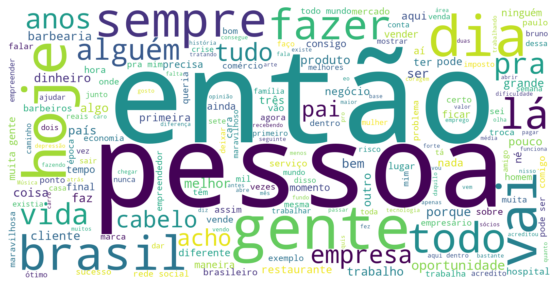

In [24]:
# importar wordcloud
from wordcloud import WordCloud

# importar a biblioteca nltk
import nltk
 
# baixar a base de stopwords
nltk.download('stopwords')
 
# atribuir as stopwords (em português) à variável
stopwords = nltk.corpus.stopwords.words('portuguese')

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()


### Remoção de Stopwords

Uma das tarefas muito utilizadas no pré-processamento de textos é a remoção de stopwords. Esse método consiste em remover palavras muito frequentes, tais como “a”, “de”, “o”, “da”, “que”, “e”, “do” entre outras, pois na maioria das vezes não são informações relevantes para a construção do modelo.

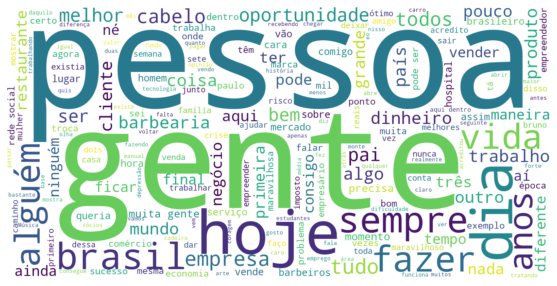

In [25]:
# lista de stopword
stopwords.extend(["pra","pro","deu","faz","vou","quer","vai","porque","então","lá","todo","acho","mim"])


# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()

In [26]:
sorted(((value,key) for (key,value) in wordcloud.words_.items()), reverse=True)[0:30]

[(1.0, 'pessoa'),
 (0.9354838709677419, 'gente'),
 (0.9032258064516129, 'hoje'),
 (0.8064516129032258, 'dia'),
 (0.5806451612903226, 'sempre'),
 (0.5806451612903226, 'brasil'),
 (0.5483870967741935, 'fazer'),
 (0.5161290322580645, 'vida'),
 (0.5161290322580645, 'alguém'),
 (0.4838709677419355, 'tudo'),
 (0.4838709677419355, 'empresa'),
 (0.4838709677419355, 'anos'),
 (0.41935483870967744, 'todos'),
 (0.41935483870967744, 'cabelo'),
 (0.3870967741935484, 'pai'),
 (0.3870967741935484, 'oportunidade'),
 (0.3870967741935484, 'melhor'),
 (0.3548387096774194, 'ser'),
 (0.3548387096774194, 'bem'),
 (0.3225806451612903, 'trabalho'),
 (0.3225806451612903, 'produto'),
 (0.3225806451612903, 'país'),
 (0.3225806451612903, 'dinheiro'),
 (0.3225806451612903, 'coisa'),
 (0.3225806451612903, 'cliente'),
 (0.3225806451612903, 'barbearia'),
 (0.3225806451612903, 'algo'),
 (0.2903225806451613, 'pouco'),
 (0.2903225806451613, 'outro'),
 (0.2903225806451613, 'mundo')]

Na figura acima, extraí a frequência das palavras. Sem surpresa, **'pessoa', 'brasil', 'empresa' e 'gente'** foram as palavras **mais utilizadas** nesta entrevista. 

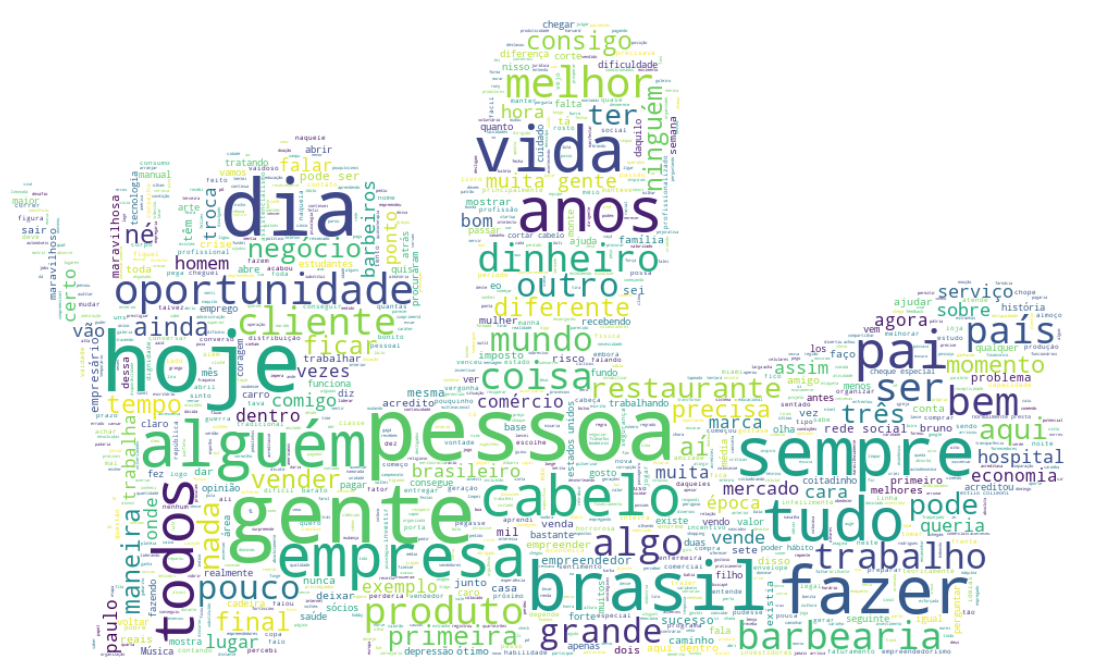

In [27]:
# endereço LOCAL da SUA imagem
venk = np.array(Image.open("/content/brunovenk.jpg"))

wordcloud = WordCloud(background_color="white", max_words=2000, 
                      mask=venk, stopwords=stopwords, 
                      max_font_size=80, random_state=42).generate(palavras)


fig, ax = plt.subplots(figsize = (20,12))
ax.imshow(wordcloud, interpolation="bilinear")
ax.set_axis_off()
plt.show()

#Conclusão

Para facilitar o entendimento e gerar insights, criei uma wordcloud em cima da foto tirada pelo marca Reserva do Bruno segurando uma maçã. A visualização facilita o entendimento, e isso pode ser comprovado ao olhar o resultado dessa nuvem relativa a legenda do vídeo retirado do Youtube.

Para um profissional empreendedor é natural que encontremos em seu vocabulário palavras em destaque como:

* Pessoa,
*  Gente,
*  Cabelo,
*  Brasil,
*  Trabalho,
*  Produto,
*  Barbearia,
*  Oportunidade,

e como estamos estudando o Bruno, lógico que teria em evidencia a **palavra Pai**.

Bom, como todos sabem, sou fã do Bruno. Ele me encorajou a empreender e seguir meu próprio caminho, admiro a pessoa, seus trabalhos e como ele tem valorizado o trabalho de seus amigos. Fato que me fez também, divulgar e consumir o que meus amigos empreendedores fazem.

Espero que gostem e até breve.

<center> Gabriel Augusto Machado - Data Scientist


